<a href="https://colab.research.google.com/github/pudepiedj/OpenVoice/blob/main/Phase_Kickback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase Kickback

In [145]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

## Exploring the CNOT-Gate

In the previous tutorial, we saw a very basic results with the CNOT gate. In this tutorial we will explore some more interesting results because of it.

We know that we could entangle the two qubits by placing the control qubit in the state $|+⟩$

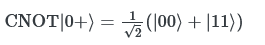


But what happens if we have another superposition?

In [146]:
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler, Estimator
from math import pi
import numpy as np
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

Let's make a circuit for that:

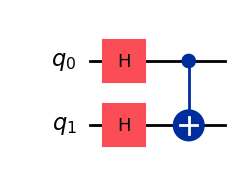

In [147]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

In the circuit above, we have the CNOT acting on the state:

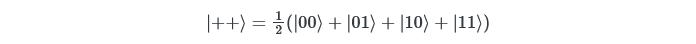


Since CNOT swaps the amplitudes of $|01⟩$ and $|11\rangle$, we see no change:

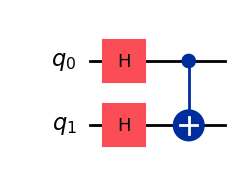

In [148]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw('mpl'))  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
final_state = Statevector.from_instruction(qc)


In [149]:
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))


<IPython.core.display.Latex object>

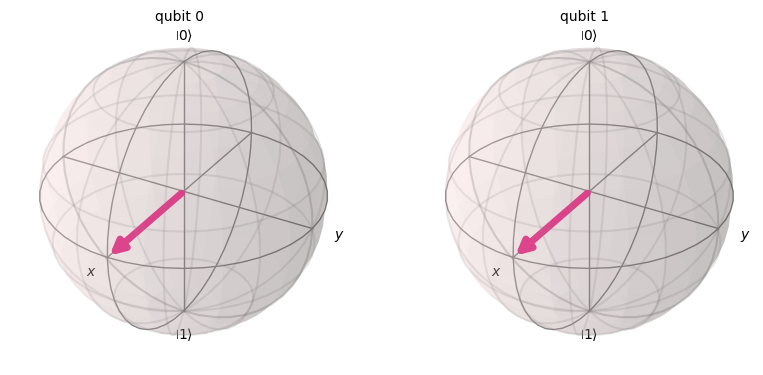

In [150]:
plot_bloch_multivector(final_state)

Let’s put the target qubit in the state $|-⟩$ , so it has a negative phase:

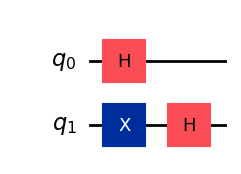

In [151]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw('mpl')

This creates the state:

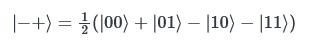

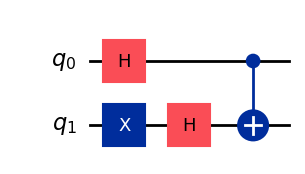

In [152]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
display(qc.draw('mpl'))
# See the result
final_state = Statevector.from_instruction(qc)



In [153]:
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))


<IPython.core.display.Latex object>

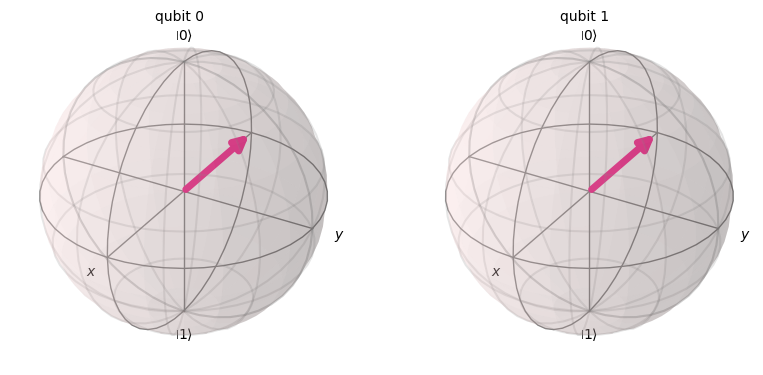

In [154]:
plot_bloch_multivector(final_state)

If the CNOT acts on this state, we will swap the amplitudes of $|01\rangle$ and $|11⟩$, resulting in the state:

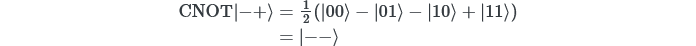

This is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged.

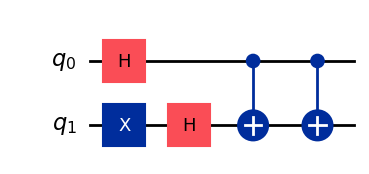

In [155]:
qc.cx(0,1)
display(qc.draw('mpl'))

final_state = Statevector.from_instruction(qc)


In [156]:
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))


<IPython.core.display.Latex object>

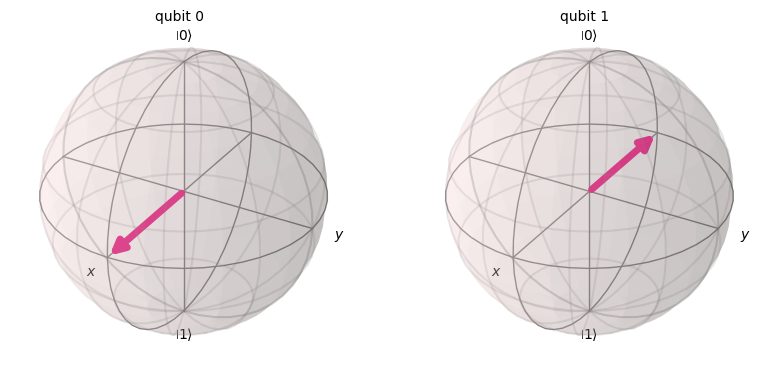

In [157]:
plot_bloch_multivector(final_state)

If you remember the H-gate transforms $|+⟩ → |0⟩$ and $|-⟩ → |1⟩$, we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction:


identities_1.svg

We can verify this using Qiskit's Aer simulator:

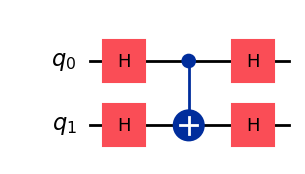

In [158]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl'))

unitary = Operator(qc)


In [159]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

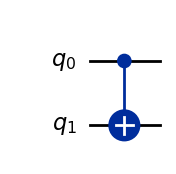

In [160]:
qc = QuantumCircuit(2)
qc.cx(0,1)
display(qc.draw('mpl'))

cnot = Operator(qc)

In [161]:
array_to_latex(cnot, prefix="\\text{CNOT = }\n")

<IPython.core.display.Latex object>

But this is confusing because it means that in qiskit CNOT changes |00>+|01>+|10>+|11> to |00> + |11> + |10> + |01> suggesting that qiskit is using the second bit as the control, which indeed it does because for qiskit q_0 of the control bit.
Perhaps that is the answer to the controlled phase-shift conundrum.
If we start with |1> $\otimes$ (|0> +|1>) ime= (|10> + |11>) s$ |1> then when we apply the controlled phase we go to (|10> + e^(i$\theta$)|11> and when we then apply the CNOT this becomes (|10> + e^(i$\theta$)|01>)

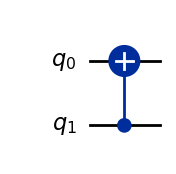

In [162]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw('mpl'))


unitary = Operator(qc)


In [163]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

This identity is an example of phase kickback, which leads us neatly on to the next section...

## Phase Kickback

### Explaining the CNOT Circuit Identity

In the previous section we saw this identity:


identities_1.svg

This is an example of kickback (or, phase kickback ) which is very important and is used in almost every quantum algorithm. Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. For example, we saw that performing an X-gate on a $|-⟩$ qubit gives it the phase $-1$:


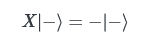

When our control qubit is in either $|0⟩$ or $|1⟩$, this phase affects the whole state, however it is a global phase and has no observable effects:

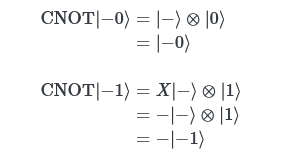

The interesting effect is when our control qubit is in superposition. The component of the control qubit that lies in the direction of $|1⟩$ applies this phase factor to the corresponding target qubit. This applied phase factor in turn introduces a relative phase into the control qubit:

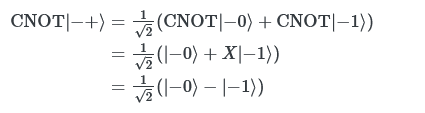

This can then be written as the two separable qubit states:

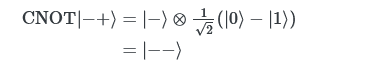

Wrapping the CNOT in H-gates transforms the qubits from the computational basis to the $|+\rangle , |-\rangle$ basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions

### Kickback with the T-gate

Let’s look at another controlled operation, the controlled-T gate:

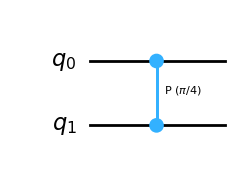

In [164]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw('mpl')

The T-gate has the matrix:

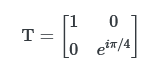

And the controlled-T gate has the matrix:

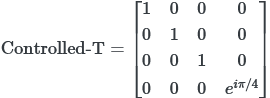

We can verify this using Qiskit's Aer simulator:

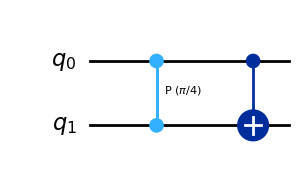

In [165]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.cx(0,1)
display(qc.draw('mpl'))
# See Results:
unitary = Operator(qc)


In [166]:
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

<IPython.core.display.Latex object>

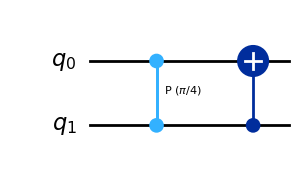

In [167]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.cx(1,0)
display(qc.draw('mpl'))
# See Results:
unitary = Operator(qc)


In [168]:
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

<IPython.core.display.Latex object>

More generally, we can find the matrix of any controlled-U operation using the rule:

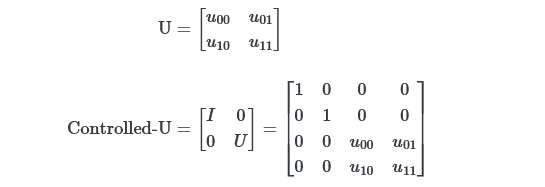

Or, using Qiskit's qubit ordering:


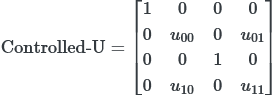

If we apply the T-gate to a qubit in the state $|1⟩$ , we add a phase of $e^{\iota \pi/4}$ to this qubit:

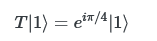

This is global phase and is unobservable. But if we control this operation using another qubit in the $|+\rangle$ state, the phase is no longer global but relative, which changes the relative phase in our control qubit:

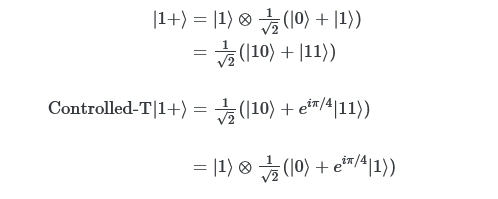

This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged. Let's see this in Qiskit:

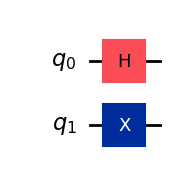

In [169]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
# See Results:
final_state = Statevector.from_instruction(qc)


We can see these two qubits separately in the Bloch sphere.

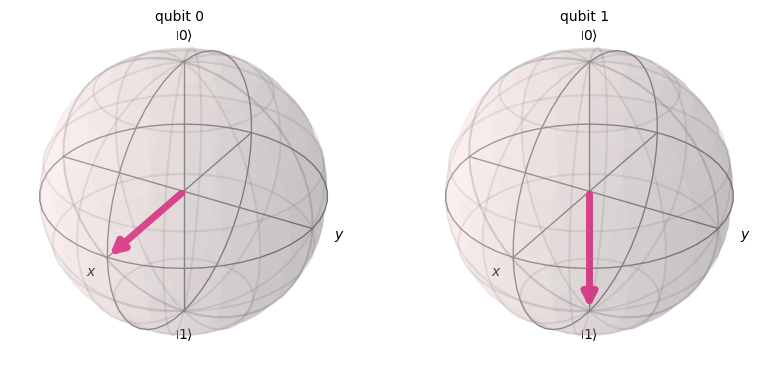

In [170]:
plot_bloch_multivector(final_state)

Now we apply a rotation.

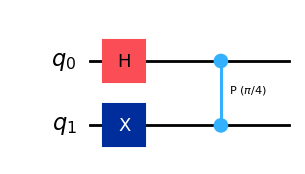

     ┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘         


In [171]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))
print(qc)
# See Results:
final_state = Statevector.from_instruction(qc)


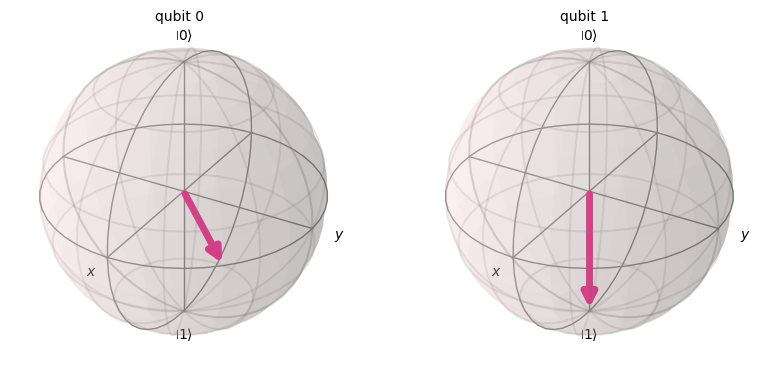

In [172]:
plot_bloch_multivector(final_state)

We can see the leftmost qubit has been rotated by $\pi/4$ around the Z-axis of the Bloch sphere as expected. After exploring this behaviour, it may become clear why Qiskit draws the controlled-Z rotation gates in this symmetrical fashion (two controls instead of a control and a target). There is no clear control or target qubit for all cases.


In [173]:
array_to_latex(final_state, prefix="\\text{Controlled-T} = \n")

<IPython.core.display.Latex object>

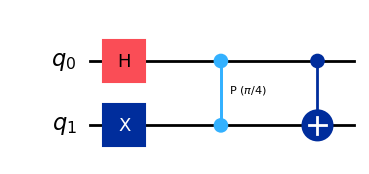

In [174]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
qc.cx(0,1)
display(qc.draw('mpl'))
# See Results:
final_state = Statevector.from_instruction(qc)

In [175]:
array_to_latex(final_state, prefix="\\text{Controlled-T} = \n")

<IPython.core.display.Latex object>

Number to factorise: 21


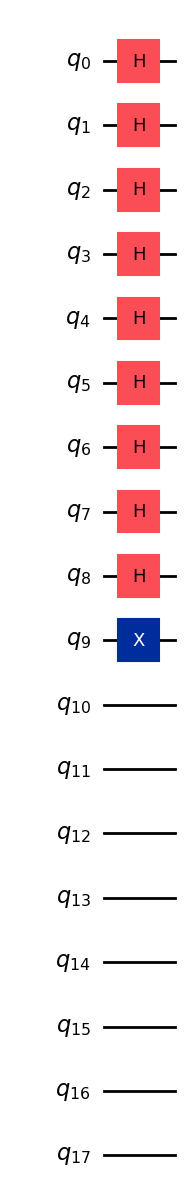

In [176]:
import matplotlib.pyplot as plt
import math
N = int(input("Number to factorise: ",))
n = int(math.ceil(math.log2(N**2)))  # Number of qubits needed for x plus one for the eigenstate
m = int(math.ceil(math.log2(N**2)))    # Number of qubits needed for f(x)
qc = QuantumCircuit(n + m)
qc.h(range(n))  # Apply Hadamard gates to create superposition of x values on register 1
qc.x(n)         # The least significant bit of the target register is set to |1> so it holds |00...01> = 1
display(qc.draw('mpl'))

In [177]:
phase_total = 0
a = input("Smallest modular base to use: ",)
a = int(a)
for i in range(n):
    a_exp = int(a**(2**i) % N)
    a_exp_bits = bin(a_exp)[2:].zfill(m)
    print(f'Current Unitary result: {a_exp:02.0f} = 0x{a_exp_bits}')

    for j in range(m):
        if a_exp_bits[j] == '1':
            angle = a_exp * np.pi / N
            qc.cp(angle, n-j-1, n+m-j-1)
            # qc.cx(n-j-1, n+m-j-1)
            phase_total += a_exp    # because each additional shift contributes to the cyclic phase total
            print(f"Have just added {a_exp} to the phase_total which is now {phase_total}")

          # If we have completed an eigenstate cycle, don't add any more phase or CNOT gates and break
    if phase_total % N == 0:
        print(f"Phase total = {phase_total} is a multiple of {N}")
        break

Current Unitary result: 05 = 0x000000101
Have just added 5 to the phase_total which is now 5
Have just added 5 to the phase_total which is now 10
Current Unitary result: 04 = 0x000000100
Have just added 4 to the phase_total which is now 14
Current Unitary result: 16 = 0x000010000
Have just added 16 to the phase_total which is now 30
Current Unitary result: 04 = 0x000000100
Have just added 4 to the phase_total which is now 34
Current Unitary result: 16 = 0x000010000
Have just added 16 to the phase_total which is now 50
Current Unitary result: 04 = 0x000000100
Have just added 4 to the phase_total which is now 54
Current Unitary result: 16 = 0x000010000
Have just added 16 to the phase_total which is now 70
Current Unitary result: 04 = 0x000000100
Have just added 4 to the phase_total which is now 74
Current Unitary result: 16 = 0x000010000
Have just added 16 to the phase_total which is now 90


Starting the QFT


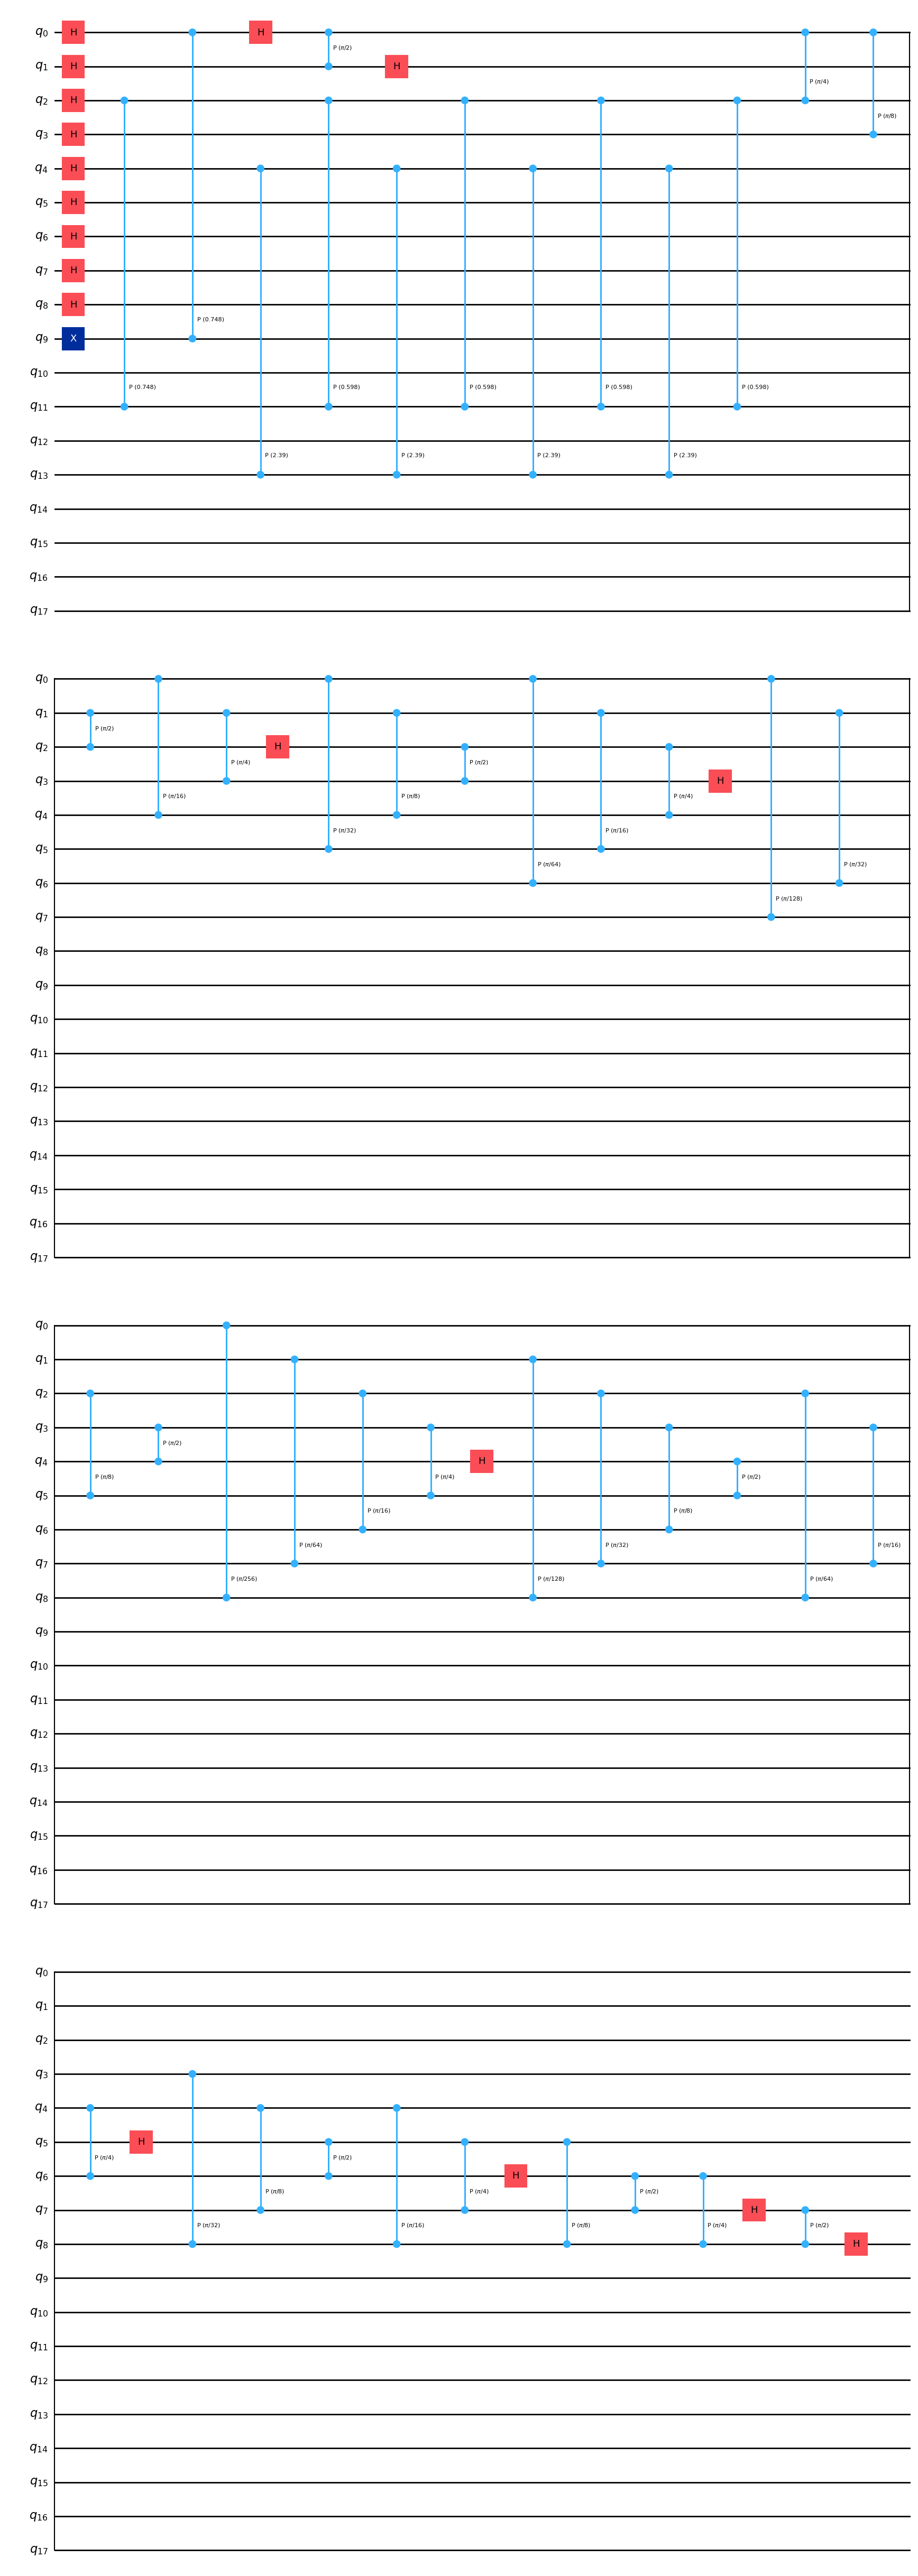

In [178]:
print("Starting the QFT")
for i in range(n):
    qc.h(i)
    for j in range(i+1, n):
        qc.cp(np.pi/(2**(j-i)), j, i)

display(qc.draw('mpl'))

Now we SWAP the qubits in readiness for the IQFT which will mean the measures will be inverted
This automatically caters for odd and even numnbers of qubits in the counting-register

In [179]:
n_qubits = n
for i in range(n_qubits//2):
   qc.swap(i, n_qubits-1-i)

In [180]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

Starting the measurement
Number of qubits = 9
      ┌───┐                         ┌───┐                            »
 q_0: ┤ H ├────────────■────────────┤ H ├──────■─────────────────────»
      ├───┤            │            └───┘      │P(π/2)      ┌───┐    »
 q_1: ┤ H ├────────────┼───────────────────────■────────────┤ H ├────»
      ├───┤            │                                    └───┘    »
 q_2: ┤ H ├─■──────────┼──────────────────────■──────────────────────»
      ├───┤ │          │                      │                      »
 q_3: ┤ H ├─┼──────────┼──────────────────────┼──────────────────────»
      ├───┤ │          │                      │                      »
 q_4: ┤ H ├─┼──────────┼──────────■───────────┼───────────■──────────»
      ├───┤ │          │          │           │           │          »
 q_5: ┤ H ├─┼──────────┼──────────┼───────────┼───────────┼──────────»
      ├───┤ │          │          │           │           │          »
 q_6: ┤ H ├─┼──────────┼───────

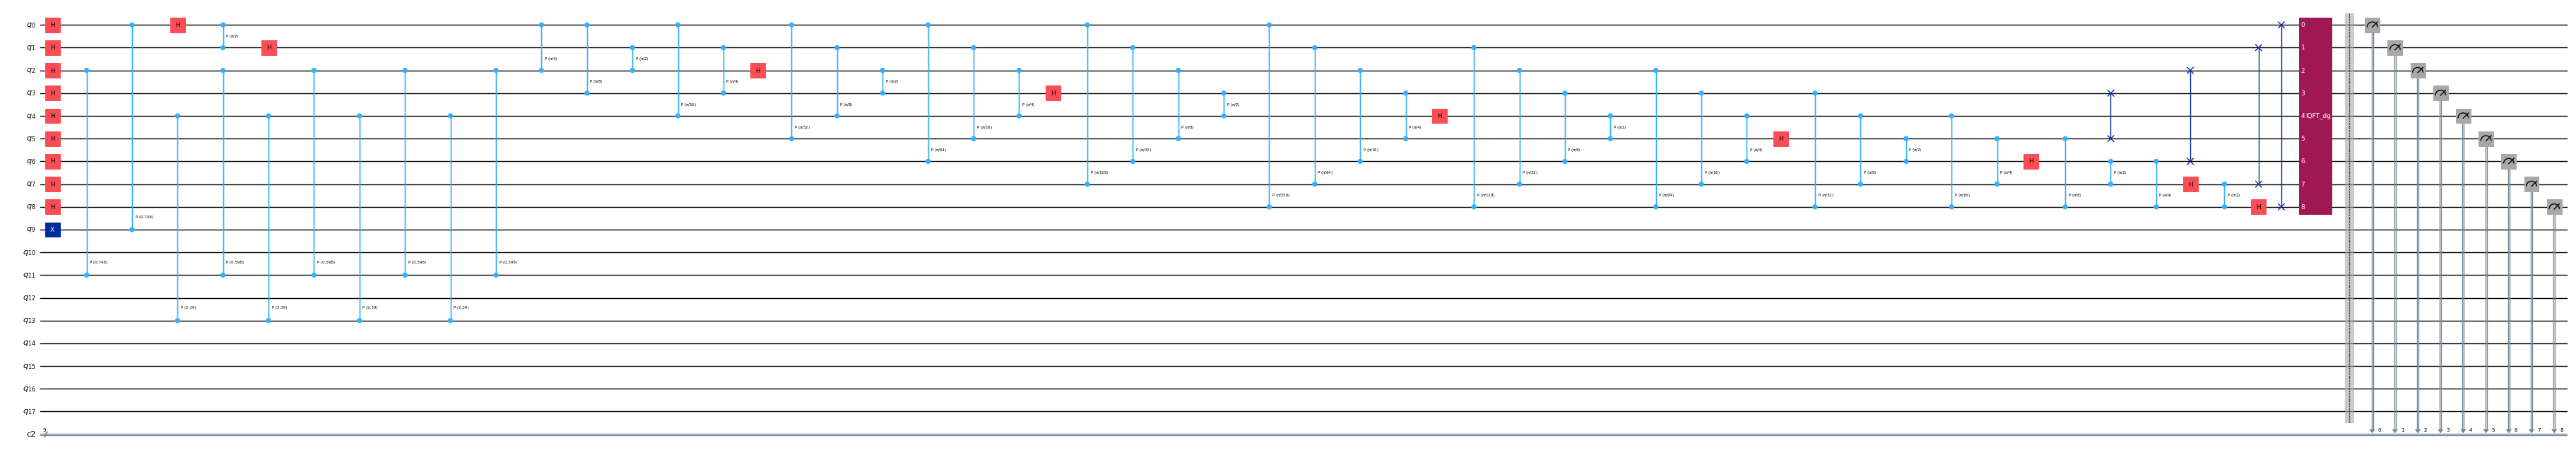

In [181]:
shots = 2000
print("Starting the measurement")
qft_circuit = qc.copy()

print(f"Number of qubits = {n}")

if qft_circuit.num_qubits < n:
    print(f"Adjusting bits {n}")
    qft_circuit.add_register(QuantumRegister(n - qft_circuit.num_qubits))

# Allocate classical bits to store the measurement results
classical_bits = ClassicalRegister(n)
qft_circuit.add_register(classical_bits)

# Do the inverse QFT:
qft_circuit = qft_circuit.compose(QFT(n, inverse=True), range(n))

# Add measurement GATES - this DOES NOT perform the measurements, which are done at the next stage
qft_circuit.barrier()
for k in range(n):
    qft_circuit.measure(k,k)
# only print the circuit to the console if it is manageable
if n < 16:
    print(qft_circuit)
else:
    print(f"Circuit too large to print; more than 31 qubits {n+m}.")
display(qft_circuit.draw(output='mpl',scale=0.5,vertical_compression='medium',fold=200))

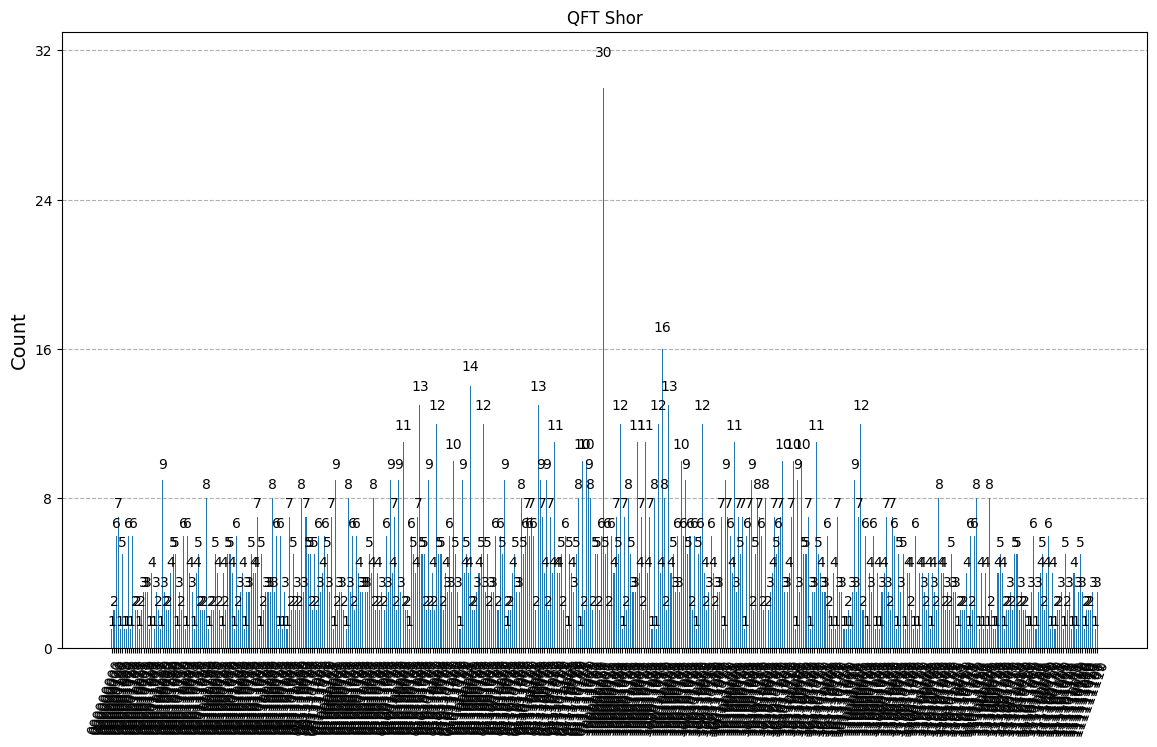

In [182]:
# Execute the circuit on a simulator
backend = AerSimulator()
t_qft = transpile(qft_circuit, backend, coupling_map=None)
counts = backend.run(t_qft, shots=shots).result().get_counts()
#counts_reversed = {bin(int(k, 2))[::-1][2:].zfill(len(k)): v for k, v in counts.items()}
counts_reversed = {k[::-1]: v for k, v in counts.items()}
#job = backend.run(qft_circuit, shots=shots)
##result = job.result()
plot_histogram(counts,(14,8),title="QFT Shor")

In [183]:
max_count = max(counts.values())
freq_dist = {i: list(counts.values()).count(i) for i in range(max_count + 1)}
for i in range(max_count + 1):
    print(f'Frequency {i} = {freq_dist[i]}')

# Calculate the total number of shots
total_shots = sum(counts.values())
print(f"Total shots counted = {total_shots}")

Frequency 0 = 0
Frequency 1 = 66
Frequency 2 = 84
Frequency 3 = 78
Frequency 4 = 59
Frequency 5 = 53
Frequency 6 = 43
Frequency 7 = 29
Frequency 8 = 16
Frequency 9 = 15
Frequency 10 = 7
Frequency 11 = 6
Frequency 12 = 6
Frequency 13 = 3
Frequency 14 = 1
Frequency 15 = 0
Frequency 16 = 1
Frequency 17 = 0
Frequency 18 = 0
Frequency 19 = 0
Frequency 20 = 0
Frequency 21 = 0
Frequency 22 = 0
Frequency 23 = 0
Frequency 24 = 0
Frequency 25 = 0
Frequency 26 = 0
Frequency 27 = 0
Frequency 28 = 0
Frequency 29 = 0
Frequency 30 = 1
Total shots counted = 2000


In [184]:
print("\033[34mStarting the count after finishing the run\033[0m")
# Get the measurement counts
#counts = result.get_counts(qft_circuit)
hit_count = 0
for k,v in counts_reversed.items():
    if v > shots/1500:
        hit_count += 1
        #print(k,v)

if hit_count <= 4:
    print(f"Insufficient large frequencies, viz. {hit_count}")

# Find the most frequent measured bitstring
most_frequent_bitstring = max(counts_reversed, key=counts_reversed.get)

# Choose how many top hits to examine although there is no particular reason to halt at a particular number
hits = shots//2
top_hits = dict(sorted(counts_reversed.items(), key=lambda x: x[1], reverse=True)[:hits])
for index, (k,v) in enumerate(top_hits.items()):
   print(f"{index:3.0f} - Top {hits} bitstrings by frequency: {k} = {int(k,2):4.0f}; frequency: {v}; mod 512: {int(k,2) % 512:3.0f}; mod 273: {int(k,2) % 273:3.0f}")


Starting the count after finishing the run
  0 - Top 1000 bitstrings by frequency: 000000001 =    1; frequency: 30; mod 512:   1; mod 273:   1
  1 - Top 1000 bitstrings by frequency: 001110001 =  113; frequency: 16; mod 512: 113; mod 273: 113
  2 - Top 1000 bitstrings by frequency: 000000110 =    6; frequency: 14; mod 512:   6; mod 273:   6
  3 - Top 1000 bitstrings by frequency: 000001001 =    9; frequency: 13; mod 512:   9; mod 273:   9
  4 - Top 1000 bitstrings by frequency: 000001110 =   14; frequency: 13; mod 512:  14; mod 273:  14
  5 - Top 1000 bitstrings by frequency: 000101010 =   42; frequency: 13; mod 512:  42; mod 273:  42
  6 - Top 1000 bitstrings by frequency: 000000011 =    3; frequency: 12; mod 512:   3; mod 273:   3
  7 - Top 1000 bitstrings by frequency: 000011010 =   26; frequency: 12; mod 512:  26; mod 273:  26
  8 - Top 1000 bitstrings by frequency: 010110001 =  177; frequency: 12; mod 512: 177; mod 273: 177
  9 - Top 1000 bitstrings by frequency: 000100001 =   33;

In [185]:
import mpmath
from fractions import Fraction

# This is from https://leancrew.com/all-this/2023/08/continued-fractions-in-python/
def continued(fraction, terms, tolerance, depth):
    a = []
    p = [0, 1]
    q = [1, 0]
    s = []
    remainder = fraction

    for _ in range(terms):
        an = int(mpmath.floor(remainder))
        remainder = remainder - an
        if remainder == 0:
            break
        remainder = 1 / remainder

        pn = an * p[-1] + p[-2]
        qn = an * q[-1] + q[-2]
        sn = Fraction(pn, qn)

        # Add terms to lists
        a.append(an)
        p.append(pn)
        q.append(qn)
        s.append(Fraction(sn))

        # Convergence check
        if math.isclose(float(fraction), float(sn), rel_tol=tolerance, abs_tol=tolerance):
            break

    return (a, s, q)

In [186]:
def gcd(a, b):
    a1, b1 = a, b
    while b != 0:
        print(f"(a,b) = ({a},{b})")
        a, b = b, a % b
    print(f"\033[32mGCD of {b1},{a1}: {a}\033[0m")
    return a

def process_shor_factors(a, r, N):
    """Process potential factors from Shor's algorithm period finding"""
    x = pow(a, r//2)
    if (x+1) % N == 0 or (x-1) % N == 0:
        print(f'This is the intractable case because {N} divides {x}+1 or {x}-1.')
        return N
    factor1 = gcd(x + 1, N)
    factor2 = gcd(x - 1, N)

    # If we find a non-trivial factor less than N
    if 1 < factor1 < N:
        # Return both this factor and N divided by it
        return [factor1, N//factor1]
    if 1 < factor2 < N:
        return [factor2, N//factor2]

    return None  # Failed to find factors

def find_prime_factors(n):
    """Return prime factorization as (prime, power) pairs."""
    factors = []
    # Handle 2 separately for efficiency
    power = 0
    while n % 2 == 0:
        power += 1
        n //= 2
    if power > 0:
        factors.append((2, power))

    divisor = 3
    while divisor * divisor <= n:
        power = 0
        while n % divisor == 0:
            power += 1
            n //= divisor
        if power > 0:
            factors.append((divisor, power))
        divisor += 2

    if n > 1:
        factors.append((n, 1))
    return factors

def generate_divisors(factors, current_divisor=1, index=0):
    """
    Generate all divisors using prime factorization.
    factors: list of (prime, power) pairs
    Returns: sorted list of all divisors
    """
    if index == len(factors):
        return [current_divisor]

    prime, power = factors[index]
    divisors = []
    # Try each possible power of this prime factor (0 up to max power)
    for i in range(power + 1):
        new_divisor = current_divisor * (prime ** i)
        divisors.extend(generate_divisors(factors, new_divisor, index + 1))
    return sorted(divisors)

def find_minimal_period(large_period, base, n):
    """
    Find minimal period by systematically testing all divisors.
    Returns (minimal_period, its_factors)
    """
    print(f"Finding prime factors of {large_period}")
    factors = find_prime_factors(large_period)
    print(f'Factors of {large_period} are {factors}')

    # Generate all possible divisors from prime factorization
    divisors = generate_divisors(factors)
    print(f'All possible divisors of {large_period} are {divisors}')

    # Test divisors in ascending order until we find smallest that works and is < n
    # Since the period of any modular exponent must always be lower than the number we are factorising
    for d in divisors:
        if pow(base, d, n) == 1 and d < n:
            return d, find_prime_factors(d)

    return large_period, factors  # Fallback if something goes wrong

def continued_fraction_convergents(fraction, tolerance):
    #tuple, convergents = continued(fraction, 20, tolerance)
    #print(f'tuple: {tuple}, convergents: {convergents}')
    #return convergents

    print(f"Fraction to convert is {fraction}")
    convergents = []
    quotients = []

    # Extract the integer part and the fractional part
    integer_part = int(fraction)
    fractional_part = fraction - integer_part

    # Initialize the variables for the continued fraction algorithm
    a, b = 1, 0
    c, d = 0, 1

    while True and fractional_part != 0:
        # Calculate the next quotient and remainder
        quotient = int(1 / fractional_part)
        remainder = 1 / fractional_part - quotient
        print(f"quotient = {quotient}; remainder = {remainder}")

        # Update the variables for the next iteration
        a, b = quotient * a + c, quotient * b + d
        c, d = a, b
        print(f"a = {a}; b = {b}; convergent ratio {a/b}")

        # Append the current convergent to the list
        convergents.append(b)

        # If the remainder is close to zero, stop the iteration
        if abs(remainder) < tolerance:
            break

        # Update the fractional part for the next iteration
        fractional_part = remainder

    print(f'Convergents: {convergents}')
    return convergents

In [187]:
for index, most_frequent_bitstring in enumerate(top_hits):
        # Convert the bitstring to an integer
    s = 0
    while s == 0:
        s = int(most_frequent_bitstring, 2)
        print(f"\033[31m{index:3.0f}\033[0m - s = {most_frequent_bitstring} = {s} occurring {counts_reversed[most_frequent_bitstring]} times; \
        fraction is {s/2**n} = [{s}/{2**n}]")

    # Determine the denominator (period r) using continued fractions
    r = 0
    if s != 0:
        # Approximate the fraction using continued fractions
        fraction = s / (2 ** n)
        #convergents = continued_fraction_convergents(fraction, 1e-11)
        partial_denominators,convergents,denominators = continued(fraction, 20, 1e-11, 0.0)
        print(f"Partial Denominators = {partial_denominators}")
        print(f"Convergents = {convergents}")
        print(f"Denominators = {denominators}")

        # Find the denominator that best approximates the fraction
        min_distance = float('inf')
        best_r = None

        for denominator in denominators:
            if denominator != 0 and denominator % 2 == 0 and denominator < pow(2,n):
                best_r = denominator

    if best_r != None:
        (r, factors) = find_minimal_period(best_r, a, N)
        print(f"Found minimal period {r} reduced from {best_r}")
        if r >= N or r == 0:
            print(f"Period {r} is greater than N = {N} or 0; this is not possible; testing next period")
            r = None
            continue

    if r != None and r != 0:
        if r % 2 != 0:
            r *= 2      # This is a fudge to make the period even; the large denominator is always even so it isn't cheating
        print(f"\033[32mPeriod r of {a} modulo {N} using best denominator: {r}\033[0m")
        residue = (a**r) % N
        print(f"Check: {a}^{r} mod {N} = {residue}")
        if residue == 1:
            input(f"\033[34mFound the period r = {r}\033[0m",)
            break

    print(f"\033[31mFailed to find period r for {a} modulo {N}\033[0m")

  0 - s = 000000001 = 1 occurring 30 times;         fraction is 0.001953125 = [1/512]
Partial Denominators = [0]
Convergents = [Fraction(0, 1)]
Denominators = [1, 0, 1]
Failed to find period r for 5 modulo 21
  1 - s = 001110001 = 113 occurring 16 times;         fraction is 0.220703125 = [113/512]
Partial Denominators = [0, 4, 1, 1, 7, 1, 1, 2, 1]
Convergents = [Fraction(0, 1), Fraction(1, 4), Fraction(1, 5), Fraction(2, 9), Fraction(15, 68), Fraction(17, 77), Fraction(32, 145), Fraction(81, 367), Fraction(113, 512)]
Denominators = [1, 0, 1, 4, 5, 9, 68, 77, 145, 367, 512]
Finding prime factors of 68
Factors of 68 are [(2, 2), (17, 1)]
All possible divisors of 68 are [1, 2, 4, 17, 34, 68]
Found minimal period 68 reduced from 68
Period 68 is greater than N = 21 or 0; this is not possible; testing next period
  2 - s = 000000110 = 6 occurring 14 times;         fraction is 0.01171875 = [6/512]
Partial Denominators = [0, 85, 3]
Convergents = [Fraction(0, 1), Fraction(1, 85), Fraction(3, 25

In [188]:
if r != None:
    '''x = a**(r/2)
    print(f"x = {x}")
    factor1 = int(gcd(x+1,N))
    factor2 = int(gcd(x-1,N))'''

    print(f"Factors of {N} are {process_shor_factors(a, r, N)}")

This is the intractable case because 21 divides 125+1 or 125-1.
Factors of 21 are 21
